<a href="https://colab.research.google.com/github/98hychoo/Tensorflow/blob/main/Course2(1_2)_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1 - Cats vs. Dogs**
*   One solution for data overfitting is to use more data.
*   We're going to use the full 25k images of dogs and cats.


In [21]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

### Downloaded the dataset and found out that the file name is kagglecatsanddogs_3367a

In [64]:

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/kagglecatsanddogs_3367a.zip"


--2021-02-19 06:59:48--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.1.244.151, 2600:1409:3800:1ab::e59, 2600:1409:3800:18d::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.1.244.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/kagglecatsanddogs_3367a.zip’

/kagglecatsanddogs_ 100%[===================>] 786.68M   104MB/s    in 7.6s    

2021-02-19 06:59:56 (103 MB/s) - ‘/kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [66]:
import os
import zipfile

local_zip = '/kagglecatsanddogs_3367a.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/kagglecatsanddogs_3367a')
zip_ref.close()

In [67]:
print(len(os.listdir('/kagglecatsanddogs_3367a/PetImages/Cat')))
print(len(os.listdir('/kagglecatsanddogs_3367a/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [68]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs')
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs/training')
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs/testing')
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs/training/dogs')
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs/training/cats')
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs/testing/dogs')
    os.mkdir('/kagglecatsanddogs_3367a/cats-v-dogs/testing/cats')
except OSError:
    pass 



In [63]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    files = []
    for file in os.listdir(SOURCE):
        file_path = SOURCE + file
        if os.path.getsize(file_path):
            files.append(file)
        else:
            print('{} is zero length, so ignoring'.format(file))    
    n_files = len(files)
    split_point = int(n_files * SPLIT_SIZE)    
    shuffled = random.sample(files, n_files)
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    for file_name in train_set:
        copyfile(SOURCE + file, TRAINING + file)   
    for file_name in test_set:
        copyfile(SOURCE + file, TESTING + file)
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/kagglecatsanddogs_3367a/PetImages/Cat/"
TRAINING_CATS_DIR = "/kagglecatsanddogs_3367a/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/kagglecatsanddogs_3367a/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/kagglecatsanddogs_3367a/PetImages/Dog/"
TRAINING_DOGS_DIR = "/kagglecatsanddogs_3367a/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/kagglecatsanddogs_3367a/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [53]:
print(len(os.listdir('/kagglecatsanddogs_3367a/cats-v-dogs/training/cats/')))
print(len(os.listdir('/kagglecatsanddogs_3367a/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/kagglecatsanddogs_3367a/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/kagglecatsanddogs_3367a/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [54]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [56]:
TRAINING_DIR = '/kagglecatsanddogs_3367a/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1.0/255)


# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,target_size=(150,150),class_mode='binary',batch_size=20)

VALIDATION_DIR = '/kagglecatsanddogs_3367a/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,target_size=(150,150),class_mode='binary',batch_size=20)




# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [58]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

warnings ignored


In [61]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
1125/1125 [==============================] - 91s 81ms/step - loss: 0.3939 - acc: 0.8283 - val_loss: 0.4167 - val_acc: 0.8176
Epoch 2/5
1125/1125 [==============================] - 99s 88ms/step - loss: 0.3534 - acc: 0.8506 - val_loss: 0.4259 - val_acc: 0.8080
Epoch 3/5
1125/1125 [==============================] - 97s 86ms/step - loss: 0.3272 - acc: 0.8646 - val_loss: 0.4249 - val_acc: 0.8236
Epoch 4/5
1125/1125 [==============================] - 86s 77ms/step - loss: 0.3050 - acc: 0.8778 - val_loss: 0.6676 - val_acc: 0.7408
Epoch 5/5
1125/1125 [==============================] - 92s 82ms/step - loss: 0.3001 - acc: 0.8810 - val_loss: 0.4860 - val_acc: 0.8024


Text(0.5, 1.0, 'Training and validation loss')

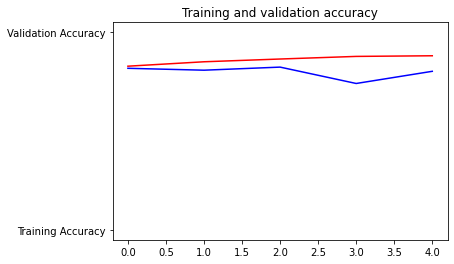

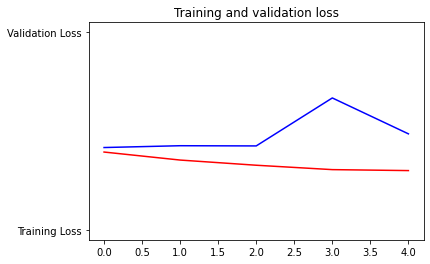

In [62]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)